# Regression and Prediction

Perhaps the most common goal in statistics is to answer the question “Is the variable $ X $ (or more likely, $ X_1, \dots, X_p $) associated with a variable $ Y $, and if so, what is the relationship and can we use it to predict $ Y $?”  
Nowhere is the nexus between statistics and data science stronger than in the realm of prediction—specifically, the prediction of an outcome (target) variable based on the values of other “predictor” variables. This process of training a model on data where the outcome is known, for subsequent application to data where the outcome is not known, is termed **supervised learning**. Another important connection between data science and statistics is in the area of anomaly detection, where regression diagnostics originally intended for data analysis and improving the regression model can be used to detect unusual records.

---

Mungkin tujuan yang paling umum dalam statistik adalah menjawab pertanyaan "Apakah variabel $ X $ (atau lebih mungkin, $ X_1, \dots, X_p $) berhubungan dengan variabel $ Y $, dan jika ya, apa hubungannya dan dapatkah kita menggunakannya untuk memprediksi $ Y $?"  
Tidak ada tempat di mana hubungan antara statistik dan ilmu data lebih kuat daripada dalam ranah prediksi—khususnya, prediksi variabel hasil (target) berdasarkan nilai-nilai variabel "prediktor" lainnya. Proses melatih model pada data di mana hasilnya diketahui, untuk kemudian diterapkan pada data di mana hasilnya tidak diketahui, disebut **pembelajaran terawasi**. Hubungan penting lainnya antara ilmu data dan statistik ada di bidang deteksi anomali, di mana diagnosis regresi yang awalnya ditujukan untuk analisis data dan peningkatan model regresi dapat digunakan untuk mendeteksi catatan-catatan yang tidak biasa.

---

## Simple Linear Regression

Simple linear regression provides a model of the relationship between the magnitude of one variable and that of a second—for example, as $ X $ increases, $ Y $ also increases. Or as $ X $ increases, $ Y $ decreases.  
Correlation is another way to measure how two variables are related—see the section “Correlation” on page 30. The difference is that while correlation measures the strength of an association between two variables, regression quantifies the nature of the relationship.

---

Regresi linier sederhana memberikan model hubungan antara besaran satu variabel dengan variabel lainnya—misalnya, ketika $ X $ meningkat, $ Y $ juga meningkat. Atau ketika $ X $ meningkat, $ Y $ justru menurun.  
Korelasi adalah cara lain untuk mengukur bagaimana dua variabel saling terkait—lihat bagian “Korelasi” pada halaman 30. Perbedaannya adalah bahwa sementara korelasi mengukur kekuatan hubungan antara dua variabel, regresi mengkuantifikasi sifat dari hubungan tersebut.

---

### The Regression Equation

Simple linear regression estimates how much $ Y $ will change when $ X $ changes by a certain amount. With the correlation coefficient, the variables $ X $ and $ Y $ are interchangeable. With regression, we are trying to predict the $ Y $ variable from $ X $ using a linear relationship (i.e., a line):  
$$
Y = b_0 + b_1 X
$$  
We read this as “$ Y $ equals $ b_1 $ times $ X $, plus a constant $ b_0 $.” The symbol $ b_0 $ is known as the intercept (or constant), and the symbol $ b_1 $ as the slope for $ X $. Both appear in R output as coefficients, though in general use the term coefficient is often reserved for $ b_1 $. The $ Y $ variable is known as the response or dependent variable since it depends on $ X $. The $ X $ variable is known as the predictor or independent variable. The machine learning community tends to use other terms, calling $ Y $ the target and $ X $ a feature vector. Throughout this book, we will use the terms predictor and feature interchangeably.

Consider the scatterplot in Figure 4-1 displaying the number of years a worker was exposed to cotton dust ($ \text{Exposure} $) versus a measure of lung capacity ($ \text{PEFR} $ or “peak expiratory flow rate”). How is $ \text{PEFR} $ related to $ \text{Exposure} $? It’s hard to tell based just on the picture.

Simple linear regression tries to find the “best” line to predict the response $ \text{PEFR} $ as a function of the predictor variable $ \text{Exposure} $:  
$$
\text{PEFR} = b_0 + b_1 \text{Exposure}
$$  
The `lm` function in R can be used to fit a linear regression.

```R
model <- lm(PEFR ~ Exposure, data=lung)
```
`lm` stands for linear model, and the `~` symbol denotes that $ \text{PEFR} $ is predicted by $ \text{Exposure} $. With this model definition, the intercept is automatically included and fitted. If you want to exclude the intercept from the model, you need to write the model definition as follows:

```R
PEFR ~ Exposure - 1
```

Printing the model object produces the following output:

```R
Call:
lm(formula = PEFR ~ Exposure, data = lung)
Coefficients:
(Intercept)     Exposure
    424.583       -4.185
```
The intercept, or $ b_0 $, is 424.583 and can be interpreted as the predicted $ \text{PEFR} $ for a worker with zero years of exposure. The regression coefficient, or $ b_1 $, can be interpreted as follows: for each additional year that a worker is exposed to cotton dust, the worker’s $ \text{PEFR} $ measurement is reduced by –4.185.

In Python, we can use `LinearRegression` from the `scikit-learn` package. (The `statsmodels` package has a linear regression implementation that is more similar to R (`sm.OLS`); we will use it later in this chapter):

```Python

predictors = ['Exposure']
outcome = 'PEFR'
model = LinearRegression()
model.fit(lung[predictors], lung[outcome])
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

```
The regression line from this model is displayed in Figure 4-2.


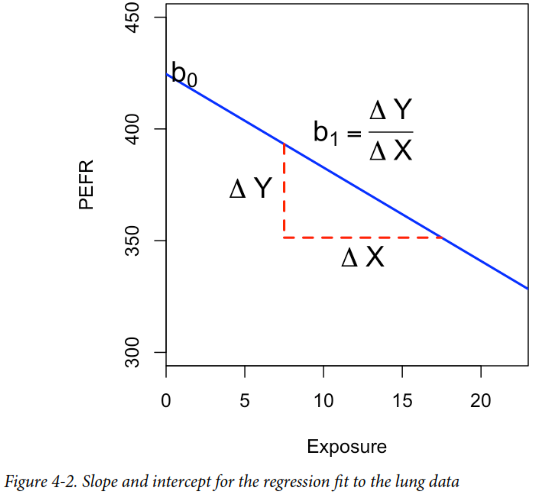

---

Regresi linier sederhana memperkirakan seberapa besar $ Y $ akan berubah ketika $ X $ berubah sebesar jumlah tertentu. Dengan koefisien korelasi, variabel $ X $ dan $ Y $ dapat dipertukarkan. Dengan regresi, kita mencoba memprediksi variabel $ Y $ dari $ X $ menggunakan hubungan linier (yaitu, garis):  
$$
Y = b_0 + b_1 X
$$  
Kita membacanya sebagai “$ Y $ sama dengan $ b_1 $ dikali $ X $, ditambah konstanta $ b_0 $.” Simbol $ b_0 $ dikenal sebagai intercept (atau konstanta), dan simbol $ b_1 $ sebagai kemiringan (slope) untuk $ X $. Keduanya muncul dalam output R sebagai koefisien, meskipun secara umum istilah koefisien sering digunakan khusus untuk $ b_1 $. Variabel $ Y $ dikenal sebagai respons atau variabel dependen karena bergantung pada $ X $. Variabel $ X $ dikenal sebagai prediktor atau variabel independen. Komunitas pembelajaran mesin cenderung menggunakan istilah lain, menyebut $ Y $ sebagai target dan $ X $ sebagai vektor fitur. Sepanjang buku ini, kami akan menggunakan istilah prediktor dan fitur secara bergantian.

Perhatikan diagram pencar pada Gambar 4-1 yang menampilkan jumlah tahun seorang pekerja terpapar debu kapas ($ \text{Exposure} $) versus ukuran kapasitas paru-paru ($ \text{PEFR} $ atau “peak expiratory flow rate”). Bagaimana hubungan antara $ \text{PEFR} $ dan $ \text{Exposure} $? Sulit untuk mengetahuinya hanya berdasarkan gambar.

Regresi linier sederhana mencoba menemukan “garis terbaik” untuk memprediksi respons $ \text{PEFR} $ sebagai fungsi dari variabel prediktor $ \text{Exposure} $:  
$$
\text{PEFR} = b_0 + b_1 \text{Exposure}
$$  
Fungsi `lm` di R dapat digunakan untuk menyesuaikan model regresi linier.

```R
model <- lm(PEFR ~ Exposure, data=lung)
```
`lm` singkatan dari linear model (model linier), dan simbol `~` menunjukkan bahwa $ \text{PEFR} $ diprediksi oleh $ \text{Exposure} $. Dengan definisi model ini, intercept secara otomatis disertakan dan disesuaikan. Jika Anda ingin mengecualikan intercept dari model, Anda perlu menulis definisi model sebagai berikut:

```R
PEFR ~ Exposure - 1
```

Mencetak objek model menghasilkan keluaran berikut:
```R
Call:
lm(formula = PEFR ~ Exposure, data = lung)
Coefficients:
(Intercept)     Exposure
    424.583       -4.185
```
Intercept, atau $ b_0 $, adalah 424.583 dan dapat diinterpretasikan sebagai prediksi $ \text{PEFR} $ untuk pekerja dengan nol tahun paparan. Koefisien regresi, atau $ b_1 $, dapat diinterpretasikan sebagai berikut: untuk setiap tambahan satu tahun seorang pekerja terpapar debu kapas, pengukuran $ \text{PEFR} $ pekerja tersebut berkurang sebesar –4.185.

Di Python, kita dapat menggunakan `LinearRegression` dari paket `scikit-learn`. (Paket `statsmodels` memiliki implementasi regresi linier yang lebih mirip dengan R (`sm.OLS`); kita akan menggunakannya nanti di bab ini):

```Python

predictors = ['Exposure']
outcome = 'PEFR'
model = LinearRegression()
model.fit(lung[predictors], lung[outcome])
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

```
Garis regresi dari model ini ditampilkan pada Gambar 4-2.


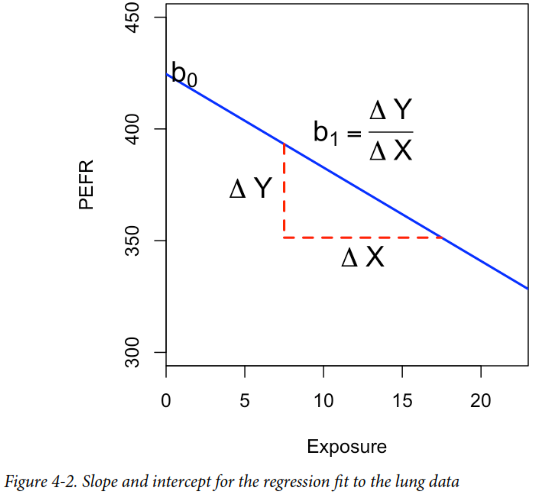

---
---


# Regression and Prediction: Key Concepts

## Introduction to Regression
Regression is a supervised learning technique used to model the relationship between a **response variable** (dependent variable) and one or more **predictor variables** (independent variables). It is widely used for prediction and explanation.

### Simple Linear Regression
- **Model**:  
  $$ Y = \beta_0 + \beta_1 X + \epsilon $$
  - $Y$: Response variable  
  - $X$: Predictor variable  
  - $\beta_0$: Intercept  
  - $\beta_1$: Slope (regression coefficient)  
  - $\epsilon$: Error term  

- **Least Squares**: Minimizes the sum of squared residuals (RSS):  
  $$ \text{RSS} = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

### Multiple Linear Regression
- **Model**:  
  $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon $$

- **Key Metrics**:
  - **RMSE** (Root Mean Squared Error):  
    $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2} $$
  - **R-squared**: Proportion of variance explained by the model:  
    $$ R^2 = 1 - \frac{\sum (Y_i - \hat{Y}_i)^2}{\sum (Y_i - \bar{Y})^2} $$

## Model Selection and Diagnostics
### Stepwise Regression
- **Forward Selection**: Start with no predictors, add variables incrementally.  
- **Backward Elimination**: Start with all predictors, remove non-significant ones.  
- **Penalized Regression**: Ridge (L2) and Lasso (L1) regression to handle multicollinearity.

### Factor Variables
- **Dummy Variables**: Convert categorical variables into binary indicators (e.g., `PropertyType` with levels → `PropertyType_SingleFamily`, `PropertyType_Townhouse`).  
- **Ordered Factors**: Use polynomial contrasts for ordered categories (e.g., `BldgGrade`).

### Regression Diagnostics
- **Outliers**: Detect using standardized residuals ($> 2.5$ or $< -2.5$).  
- **Influential Points**: Use Cook’s Distance ($> 4/(n-p-1)$) or leverage (hat-values).  
- **Heteroskedasticity**: Check residual plots for non-constant variance.  
- **Nonlinearity**: Use partial residual plots to identify nonlinear relationships.

## Nonlinear Regression
### Polynomial Regression
- **Model**:  
  $$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots + \beta_d X^d + \epsilon $$

### Spline Regression
- **Basis Splines (B-splines)**: Piecewise polynomials joined at **knots**.  
- **Generalized Additive Models (GAM)**: Automatically select knots:  
  $$ Y = \beta_0 + f_1(X_1) + f_2(X_2) + \dots + f_p(X_p) + \epsilon $$

## Practical Considerations
- **Cross-Validation**: Use k-fold CV to assess out-of-sample performance.  
- **Confounding Variables**: Omitted variables that distort relationships (e.g., `ZipCode` in housing data).  
- **Prediction vs. Explanation**: Focus on RMSE for prediction; coefficients for inference.

---

**Further Reading**:  
- *An Introduction to Statistical Learning* (James et al.) for regression and splines.  
- *The Elements of Statistical Learning* (Hastie et al.) for advanced methods like GAMs.

---
---

# Regression and Prediction: Comprehensive Overview

## 1. Introduction to Regression
Regression is a **supervised learning** technique used to model the relationship between a **response variable** (dependent variable) and one or more **predictor variables** (independent variables). It serves two primary purposes:
- **Prediction**: Forecasting future outcomes based on historical data.
- **Explanation**: Understanding the relationship between variables.

Key terms:
- **Response Variable** ($Y$): The variable to predict (e.g., house price).
- **Predictor Variables** ($X_1, X_2, ..., X_p$): Features used to predict $Y$ (e.g., square footage, bedrooms).
- **Residuals** ($\epsilon$): Differences between observed and predicted values.

---

## 2. Simple Linear Regression
Models the linear relationship between one predictor and a response variable:
$$ Y = \beta_0 + \beta_1 X + \epsilon $$

- $\beta_0$: Intercept (value of $Y$ when $X=0$).
- $\beta_1$: Slope (change in $Y$ per unit change in $X$).
- $\epsilon$: Random error term (assumed normally distributed).

### Least Squares Estimation
Finds coefficients $\beta_0$ and $\beta_1$ that minimize the **Residual Sum of Squares (RSS)**:
$$ \text{RSS} = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 = \sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2 $$

---

## 3. Multiple Linear Regression
Extends simple regression to multiple predictors:
$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon $$

### Key Metrics
1. **Root Mean Squared Error (RMSE)**:
   $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2} $$
   Measures prediction accuracy.

2. **R-squared ($R^2$)**:
   $$ R^2 = 1 - \frac{\sum (Y_i - \hat{Y}_i)^2}{\sum (Y_i - \bar{Y})^2} $$
   Proportion of variance in $Y$ explained by the model.

---

## 4. Model Selection and Diagnostics
### Stepwise Regression
- **Forward Selection**: Starts with no variables; adds predictors based on significance.
- **Backward Elimination**: Starts with all variables; removes non-significant ones.
- **Penalized Regression**: 
  - **Ridge Regression**: Adds L2 penalty $\lambda \sum \beta_j^2$.
  - **Lasso Regression**: Adds L1 penalty $\lambda \sum |\beta_j|$.

### Factor Variables
Categorical variables are encoded as **dummy variables**:
- Example: `PropertyType` (Single Family, Townhouse) becomes:
  $$ \text{PropertyType\_SingleFamily}, \text{PropertyType\_Townhouse} $$

### Regression Diagnostics
1. **Outliers**: Detected via **standardized residuals** $> 2.5$ or $< -2.5$.
2. **Influential Points**: Identified using **Cook’s Distance** $> 4/(n-p-1)$.
3. **Heteroskedasticity**: Non-constant residual variance (checked via residual plots).
4. **Nonlinearity**: Detected via **partial residual plots**.

---

## 5. Nonlinear Regression
### Polynomial Regression
Models curvature by adding polynomial terms:
$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots + \beta_d X^d + \epsilon $$

### Spline Regression
Uses piecewise polynomials (**basis splines**) joined at **knots**. Example:
$$ Y = \beta_0 + \beta_1 h_1(X) + \beta_2 h_2(X) + \epsilon $$
where $h_1, h_2$ are spline basis functions.

### Generalized Additive Models (GAMs)
Automates spline selection:
$$ Y = \beta_0 + f_1(X_1) + f_2(X_2) + \dots + f_p(X_p) + \epsilon $$
where $f_j$ are smooth functions.

---

## 6. Practical Considerations
### Cross-Validation
Assesses out-of-sample performance via **k-fold CV**:
1. Split data into $k$ folds.
2. Train on $k-1$ folds, validate on the remaining fold.
3. Average performance across all folds.

### Confounding Variables
Omitted variables that distort relationships (e.g., location in house price prediction).

### Prediction vs. Explanation
- **Prediction**: Focus on minimizing RMSE.
- **Explanation**: Focus on coefficient significance and $R^2$.

---

## 7. Advanced Topics
### Interaction Effects
Models combined effects of variables:
$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \epsilon $$

### Multicollinearity
High correlation between predictors inflates coefficient variance. Detected via **Variance Inflation Factor (VIF)**:
$$ \text{VIF}_j = \frac{1}{1 - R_j^2} $$
Values $> 5$ indicate problematic multicollinearity.

---

## 8. Conclusion
Regression remains foundational for both statistical inference and predictive modeling. Key steps include:
1. Model specification (linear, polynomial, GAM).
2. Diagnostics (residuals, outliers).
3. Validation (cross-validation, metrics).

**Further Reading**:
- *An Introduction to Statistical Learning* (James et al.) for regression fundamentals.
- *The Elements of Statistical Learning* (Hastie et al.) for advanced methods like GAMs.